# Fifth demo Fine Tune the Algorithm 

## Here are the Basic developed function 

In [1]:
def smooth_plot(ticker,field):
    ticker_regression_data = ticker[field]
    ticker_regression_data = ticker_regression_data.rolling(70).mean().rolling(70).mean()
    ticker_regression_data = ticker_regression_data.dropna() #drops the NaN elements 
    return ticker_regression_data

In [2]:
def change_alignment(ticker_series , a ,b):
    ticker_indexes = pd.Series(range(ticker_series.shape[0]))
    X = ticker_indexes.values.reshape(-1, 1)  # values converts it into a numpy array
    Y = ticker_series.values.reshape(-1, 1)
    Y_normalized = Y - (X * a + b)
    #plt.plot(X, Y_normalized, color="red")
    df = pd.DataFrame(Y_normalized , index=ticker_series.index)
    return df 

In [7]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
def finding_last_big_change_nelder_mead(ticker_series):
    err = pd.Series()
    indexing = pd.RangeIndex(start=0,stop=len(ticker_series) ,step=1)
    ticker_series["numbers"] = indexing
    leumi_regression_data_reversed = ticker_series.iloc[-45::-1] # drops the last 30 dates for regression 
    count = 0
    for date in leumi_regression_data_reversed.index: #remove [:1] after tests 
        count+=1
        linear_regressor = LinearRegression()  # create object for the class
        current_date = "{}-{}-{}".format(date.year,date.month,date.day)
        current_regression = ticker_series.loc[current_date:] 
        linear_regressor.fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        reg = LinearRegression().fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        #r2_score_data = reg.score(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        r2_score_data = mean_squared_error(current_regression["numbers"].values.reshape(-1,1), current_regression["High"].values.reshape(-1,1))
        #r2_score_data = mean_absolute_error(current_regression["numbers"].values.reshape(-1,1), current_regression["High"].values.reshape(-1,1))
        temp = pd.Series([r2_score_data],index=[current_date])
        err = pd.concat([err, temp])
    return err

In [8]:
def regression_from_date(ticker , date):
    indexing = pd.RangeIndex(start=0,stop=len(ticker) ,step=1)
    ticker["numbers"] = indexing
    current_date = "{}-{}-{}".format(date.year,date.month,date.day)
    current_regression = ticker.loc[current_date:] 
    linear_regressor = LinearRegression()
    linear_regressor.fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
    b = linear_regressor.intercept_
    a = linear_regressor.coef_ 
    
    temp = pd.Series(linear_regressor.predict(ticker["numbers"].values.reshape(-1,1)).reshape(-1))
    ticker["Dates"] = ticker.index
    data = ticker.set_index("numbers")
    data["pred y"]= temp
    data = data.set_index("Dates")
    return a.item() , b.item() , data 

In [58]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import numpy as np

def auto_calculation(ticker_series , name_ticker):
    df_nelder = smooth_plot(ticker_series,"High")
    df_nelder = pd.DataFrame(df_nelder)
    err = finding_last_big_change_nelder_mead(df_nelder)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 9))
    a , b , df = regression_from_date(ticker_series, pd.to_datetime(err.idxmin()))
    
    df["pred y"].plot(ax=axes[0], title=name_ticker) # """ax=axes[0]"""
    df["High"].plot(ax=axes[0]) # """ax=axes[0]"""
   
        

     # Plot results
    pd_err = pd.DataFrame(err , columns=["err"])
    pd_err['min'] = pd_err.err[(pd_err.err.shift(1) > pd_err.err) & (pd_err.err.shift(-1) > pd_err.err)]
    pd_err = pd_err.dropna() #drops the NaN elements 
    pd_err['min'] = pd_err['min'].apply(np.sqrt)
    #plt.scatter(pd_err.index, pd_err['min'], c='r')
    
    df1 = change_alignment(ticker_series["High"] , a ,b)
    df1[err.idxmin():].plot(ax=axes[1], title="Global Minimum")

    if(len(pd_err) > 0):
        another_date = pd.to_datetime(pd_err.index[0])
        print("Local Regression Date: " , another_date)
        a2 , b2 , another_reg = regression_from_date(ticker_series , another_date)
        another_reg["pred y"].plot(ax=axes[0])
        
        df2 = change_alignment(ticker_series["High"] , a2 ,b2)
        df2[pd_err.index[0]:].plot(ax=axes[2], title="Last Local Minimum")
    plt.show();
    
    print(pd.to_datetime(err.idxmin()))
    print(pd_err)

# Example 1

Local Regression Date:  2022-02-20 00:00:00


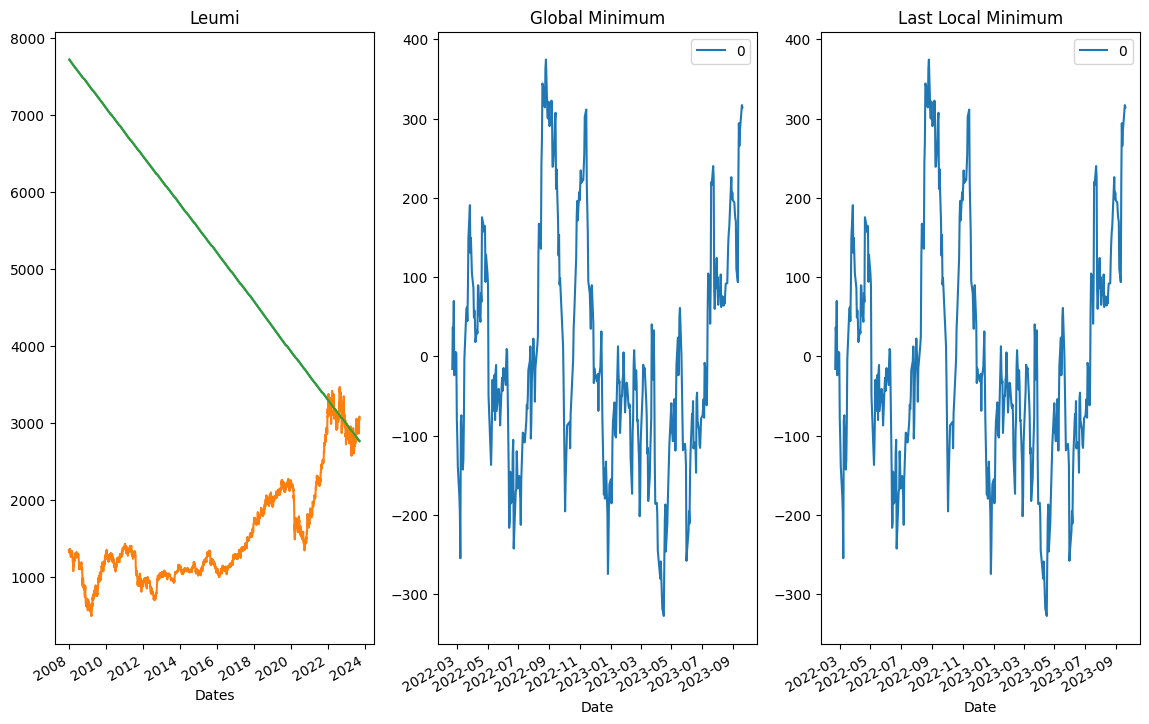

2022-02-20 00:00:00
                      err         min
2022-2-20   315323.925496  561.537110
2017-10-30  740856.199085  860.730038
2010-8-10   515671.877577  718.102971
2009-2-5    505803.866130  711.198894


In [59]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize
import yfinance as yf
leumi = yf.Ticker("LUMI.TA")
leumi_regression_data = leumi.history(start='2005-01-01',end='2023-09-20')

auto_calculation(leumi_regression_data, "Leumi")

# Run the Generalized Example 

In [61]:
import yfinance as yf

# Download 15 years of historical stocks using the daily time frame
leumi = yf.download("LUMI.TA", period="15y", interval="1d")
discount = yf.download("DSCT.TA", period="9y", interval="1d")
bezeq = yf.download("BEZQ.TA", period="9y", interval="1d")
cellcom = yf.download("CEL.TA", period="15y", interval="1d")
elbit = yf.download("ESLT.TA", period="9y", interval="1d")
nice = yf.download("NICE.TA", period="9y", interval="1d")
teva = yf.download("TEVA.TA", period="9y", interval="1d")
POLI = yf.download("POLI.TA", period="9y", interval="1d")
MZTF = yf.download("MZTF.TA", period="9y", interval="1d")
FIBI = yf.download("FIBI.TA", period="9y", interval="1d")
HARL = yf.download("HARL.TA", period="9y", interval="1d")
MGDL = yf.download("MGDL.TA", period="9y", interval="1d")
CLIS = yf.download("CLIS.TA", period="9y", interval="1d")
PHOE = yf.download("PHOE.TA", period="9y", interval="1d")
MMHD = yf.download("MMHD.TA", period="9y", interval="1d")
DRS = yf.download("DRS.TA", period="9y", interval="1d")
BSEN = yf.download("BSEN.TA", period="9y", interval="1d")
HLAN = yf.download("HLAN.TA", period="9y", interval="1d")
FTAL = yf.download("FTAL.TA", period="9y", interval="1d")
DANE = yf.download("DANE.TA", period="9y", interval="1d")
ONE = yf.download("ONE.TA", period="9y", interval="1d")
MTRX = yf.download("MTRX.TA", period="9y", interval="1d")
ALHE = yf.download("ALHE.TA", period="9y", interval="1d")
UWAY = yf.download("UWAY.TA", period="9y", interval="1d")
TRAN = yf.download("TRAN.TA", period="9y", interval="1d")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Local Regression Date:  2022-01-04 00:00:00


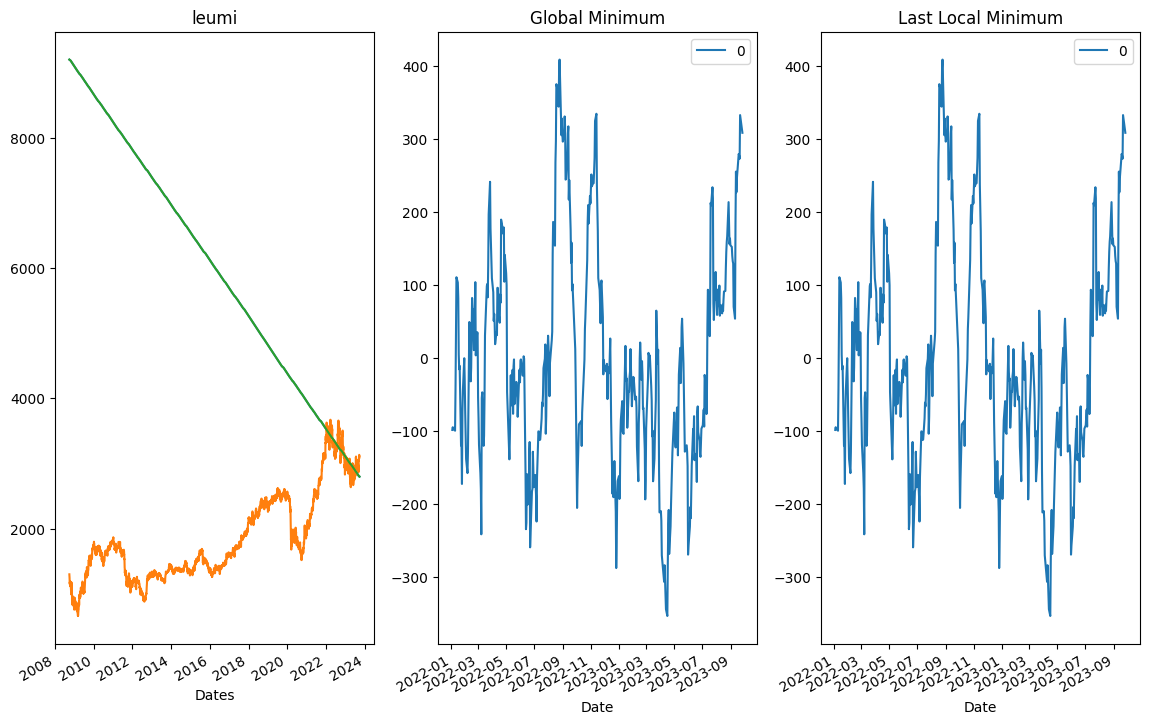

2022-01-04 00:00:00
                     err         min
2022-1-4   106542.890751  326.409085
2012-6-13  162662.932098  403.314929
Local Regression Date:  2022-08-16 00:00:00


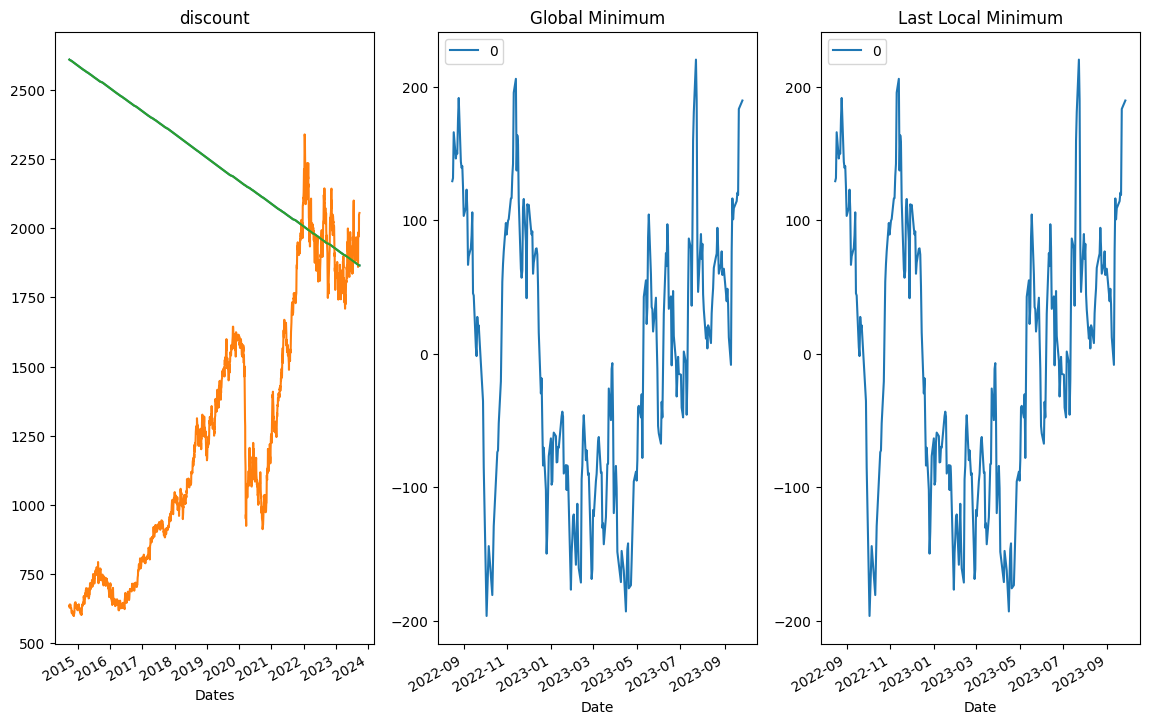

2022-08-16 00:00:00
                    err         min
2022-8-16  17700.355965  133.042685
2021-6-22  29264.064897  171.067428
2020-5-18  43233.078051  207.925655
2018-5-20  59504.395873  243.935229


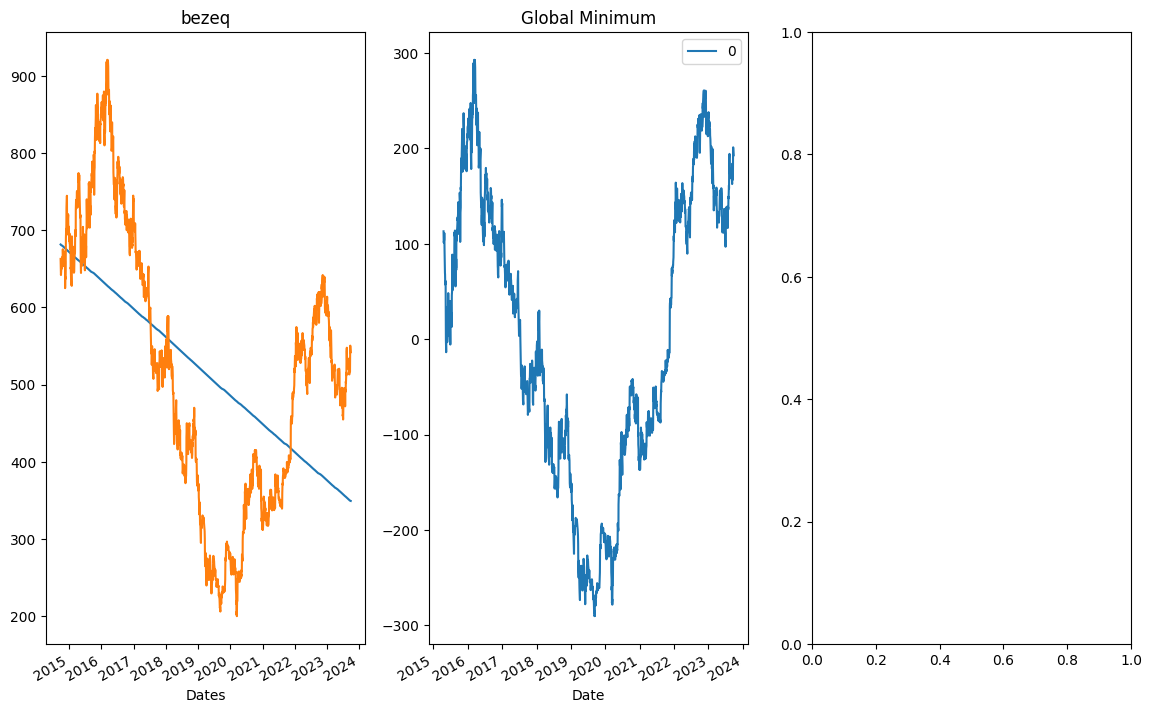

2015-04-19 00:00:00
Empty DataFrame
Columns: [err, min]
Index: []
Local Regression Date:  2022-03-15 00:00:00


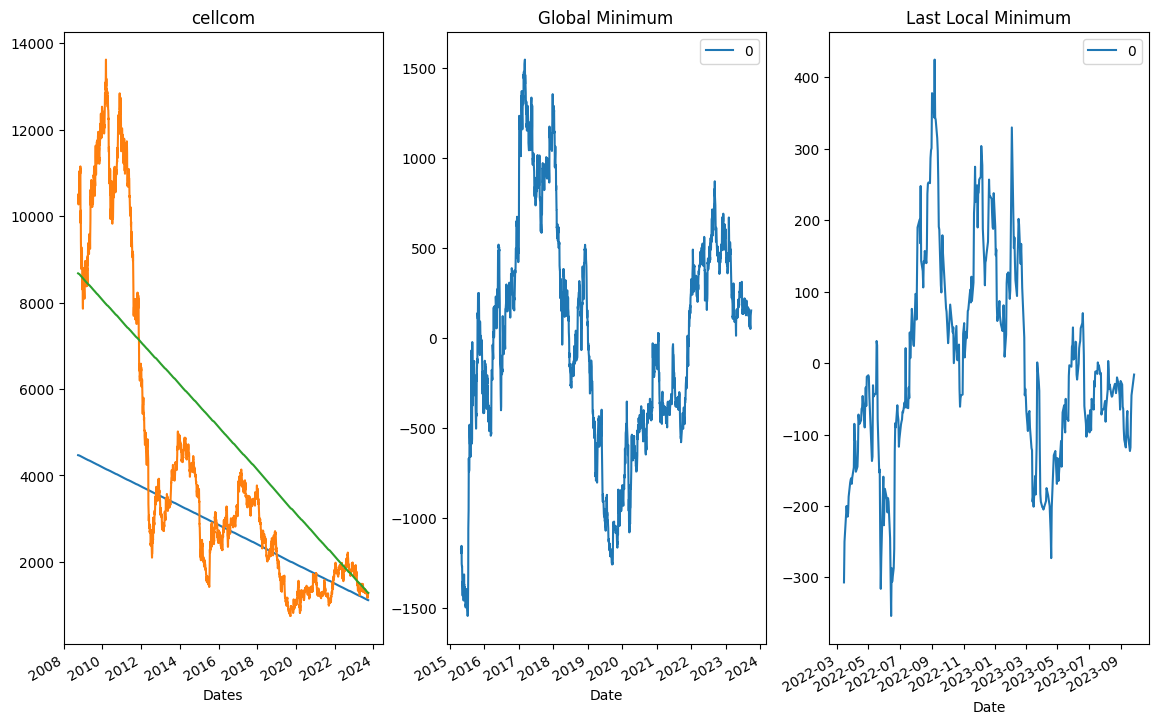

2015-04-30 00:00:00
                    err          min
2022-3-15  2.756416e+06  1660.245656
2020-3-24  2.719914e+06  1649.216088
2017-9-28  2.026771e+06  1423.647081
2015-4-30  1.794991e+06  1339.772587
Local Regression Date:  2023-02-26 00:00:00


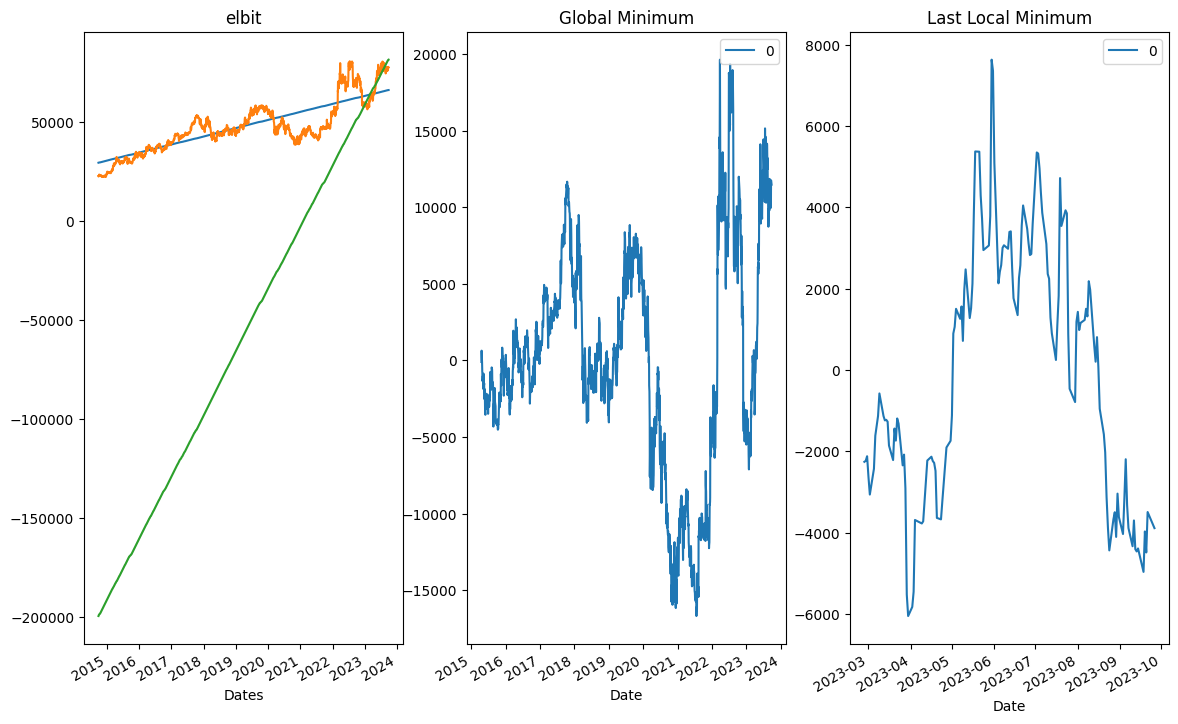

2015-04-19 00:00:00
                    err           min
2023-2-26  4.018718e+09  63393.361568
2020-3-30  2.973880e+09  54533.290714
Local Regression Date:  2022-07-21 00:00:00


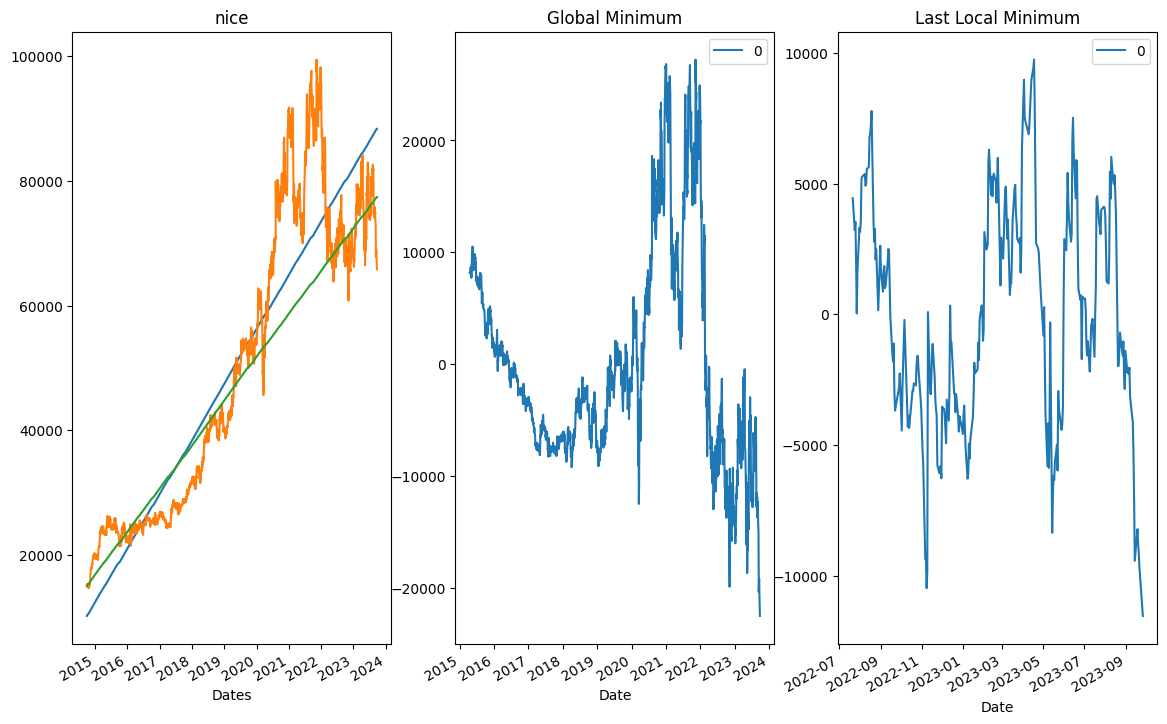

2015-04-19 00:00:00
                    err           min
2022-7-21  4.890485e+09  69931.999787
2021-8-5   5.754788e+09  75860.321094
Local Regression Date:  2022-03-03 00:00:00


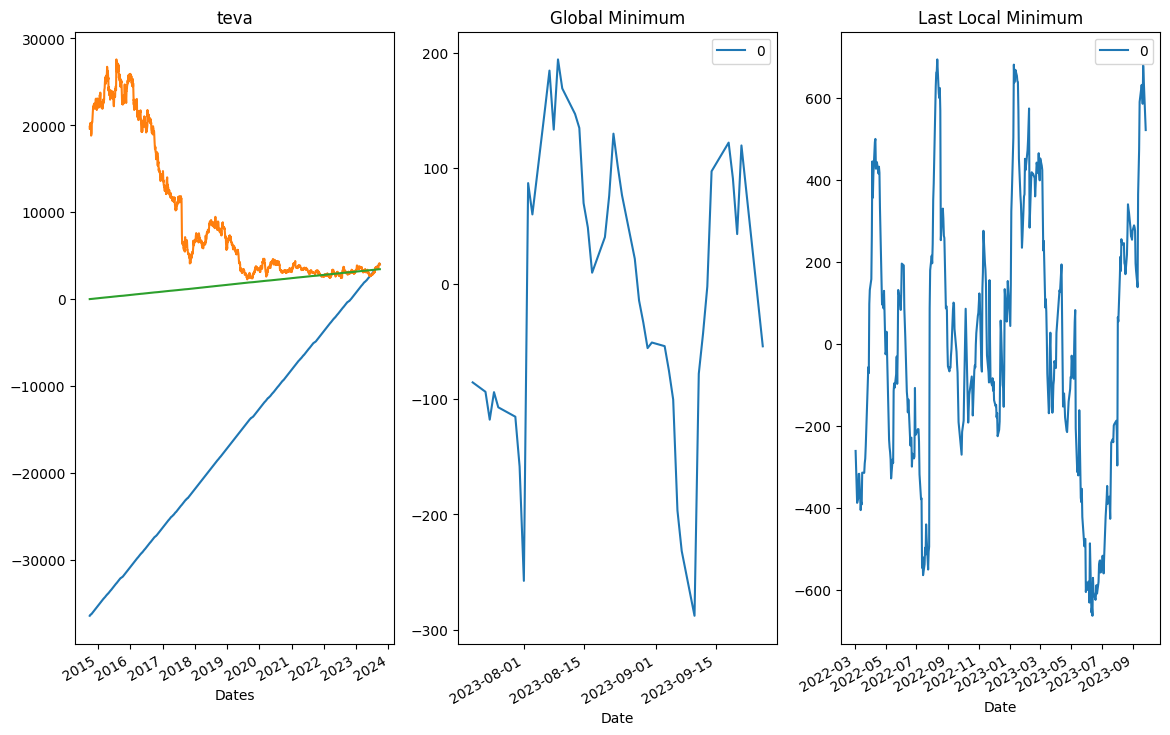

2023-07-20 00:00:00
                    err          min
2022-3-3   1.336982e+06  1156.279330
2019-12-1  3.043965e+06  1744.696362
Local Regression Date:  2020-06-30 00:00:00


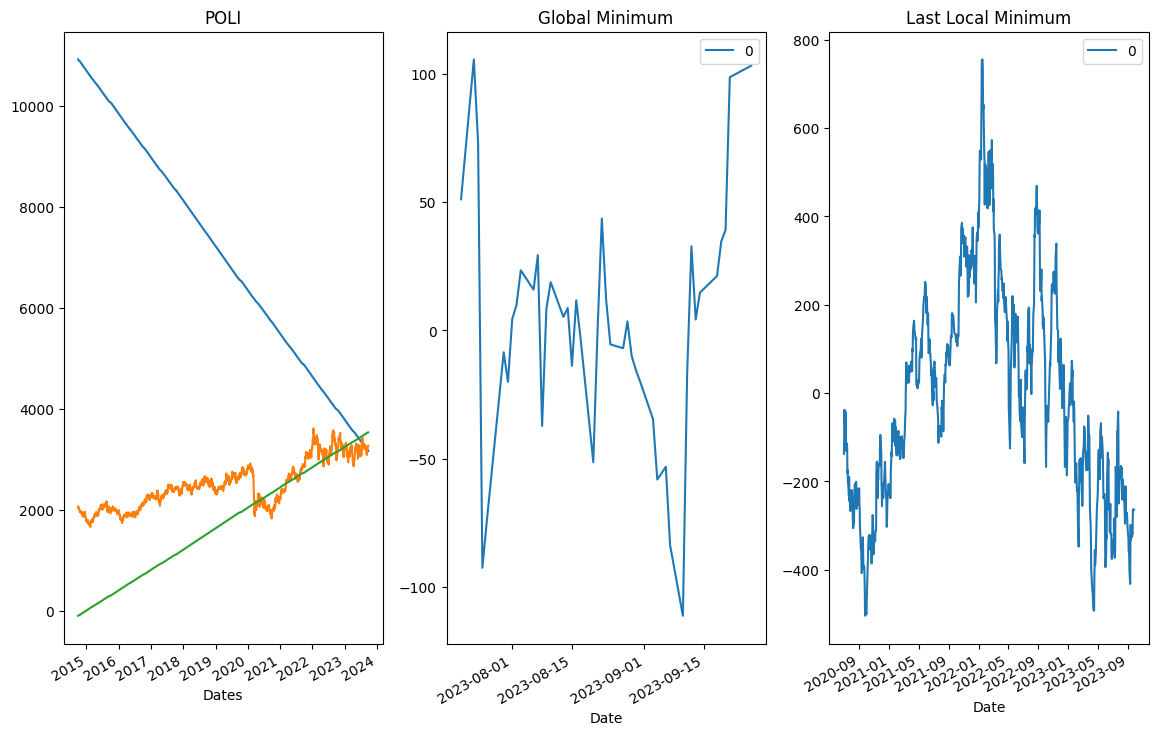

2023-07-20 00:00:00
                    err          min
2020-6-30  1.292895e+06  1137.055449
Local Regression Date:  2023-04-19 00:00:00


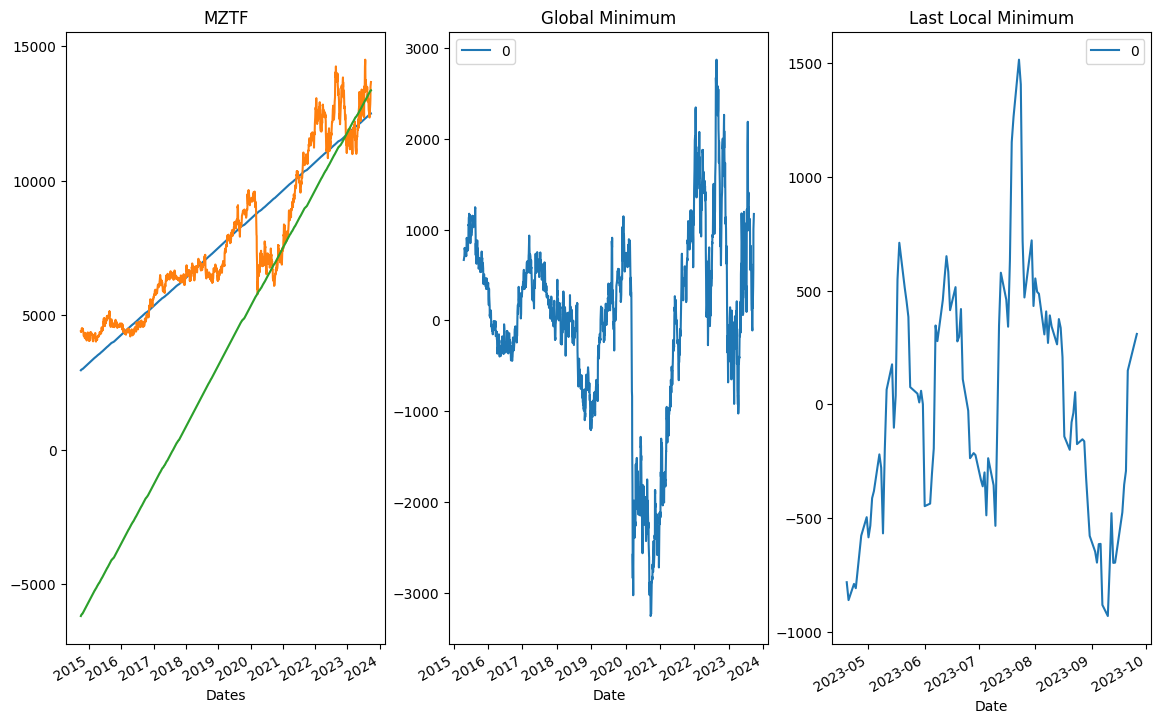

2015-04-19 00:00:00
                    err           min
2023-4-19  1.001511e+08  10007.553210
2022-7-14  1.072044e+08  10353.958063
Local Regression Date:  2023-05-28 00:00:00


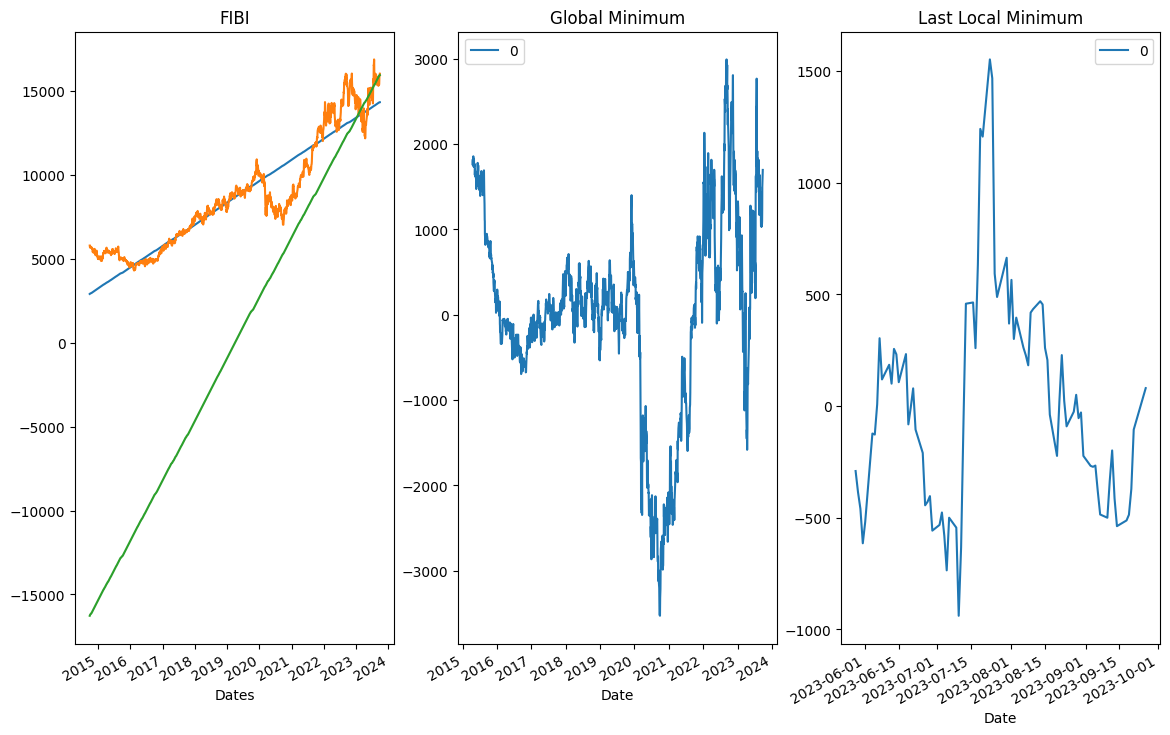

2015-04-19 00:00:00
                    err          min
2023-5-28  1.418276e+08  11909.13958
Local Regression Date:  2021-11-02 00:00:00


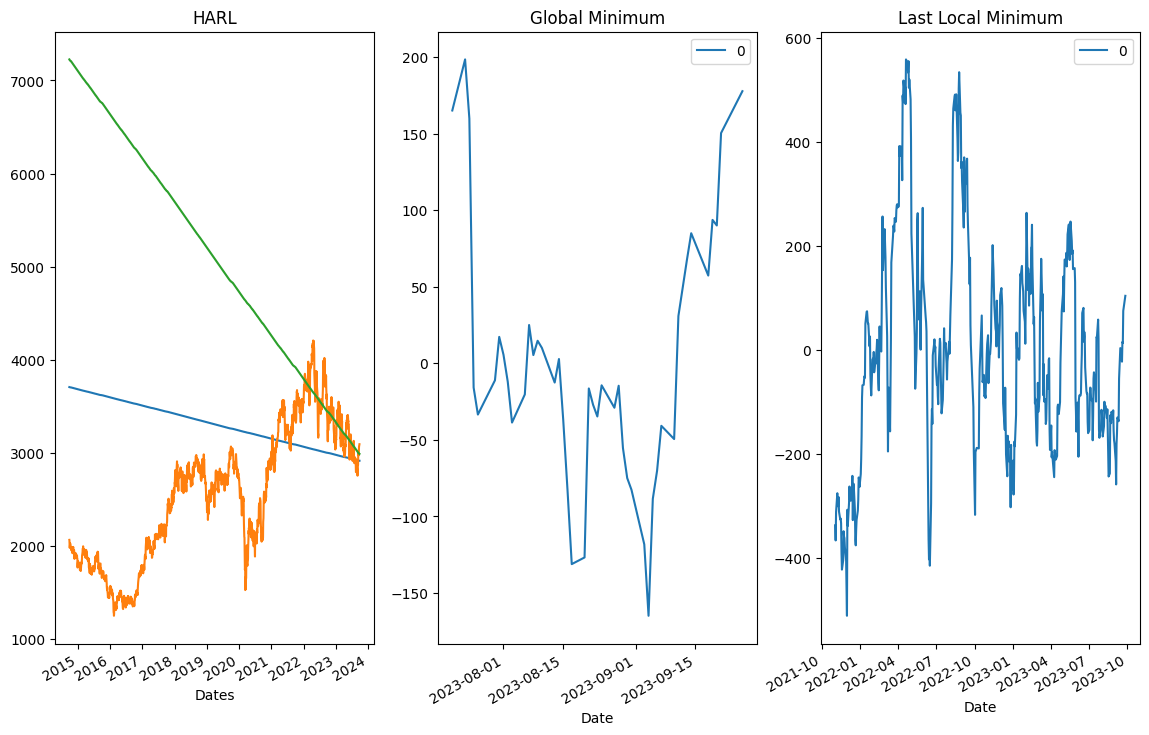

2023-07-20 00:00:00
                    err          min
2021-11-2  2.748787e+06  1657.946481
2020-3-24  2.232336e+06  1494.100286
2016-1-14  2.335177e+06  1528.128488


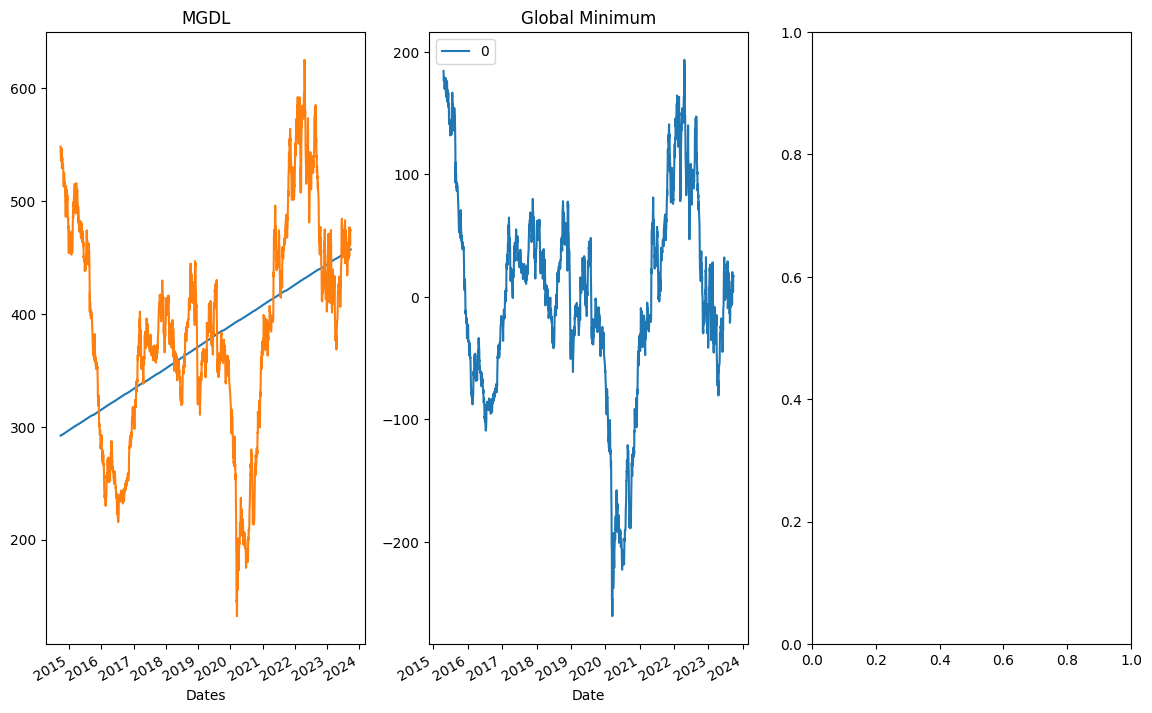

2015-04-19 00:00:00
Empty DataFrame
Columns: [err, min]
Index: []
Local Regression Date:  2023-07-18 00:00:00


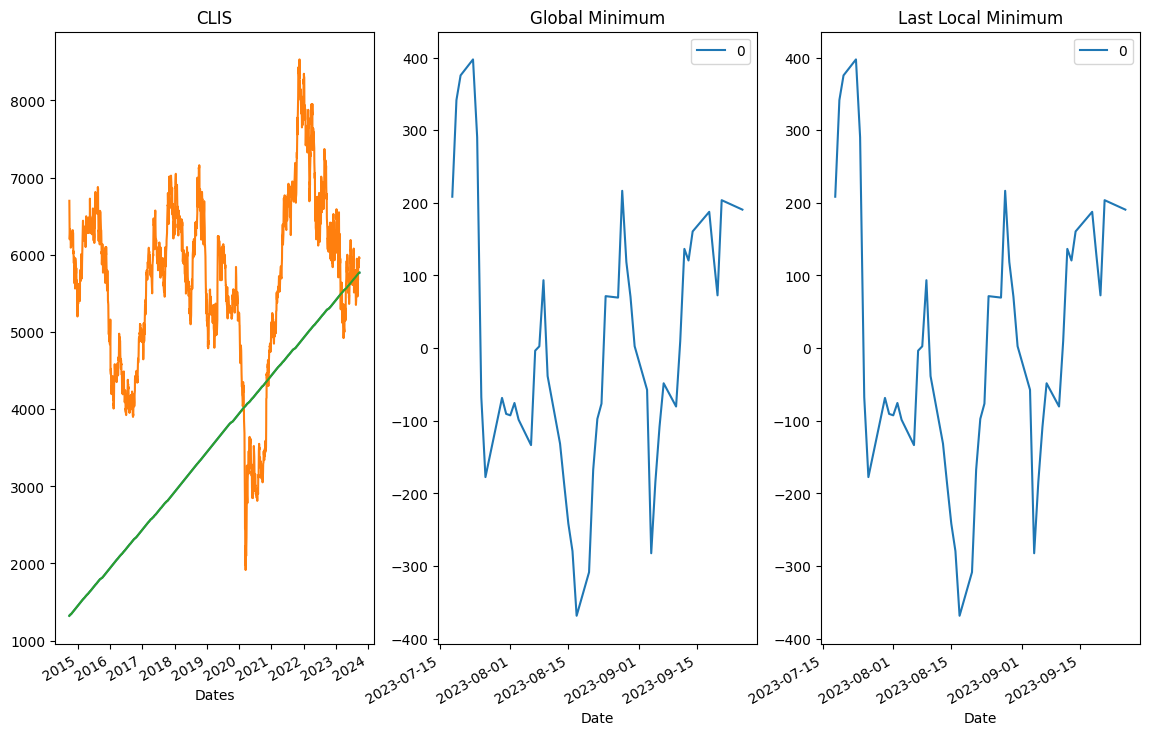

2023-07-18 00:00:00
                    err          min
2023-7-18  1.269641e+07  3563.202437
2020-1-23  1.774569e+07  4212.563341
2016-4-21  2.076426e+07  4556.781667
Local Regression Date:  2023-05-29 00:00:00


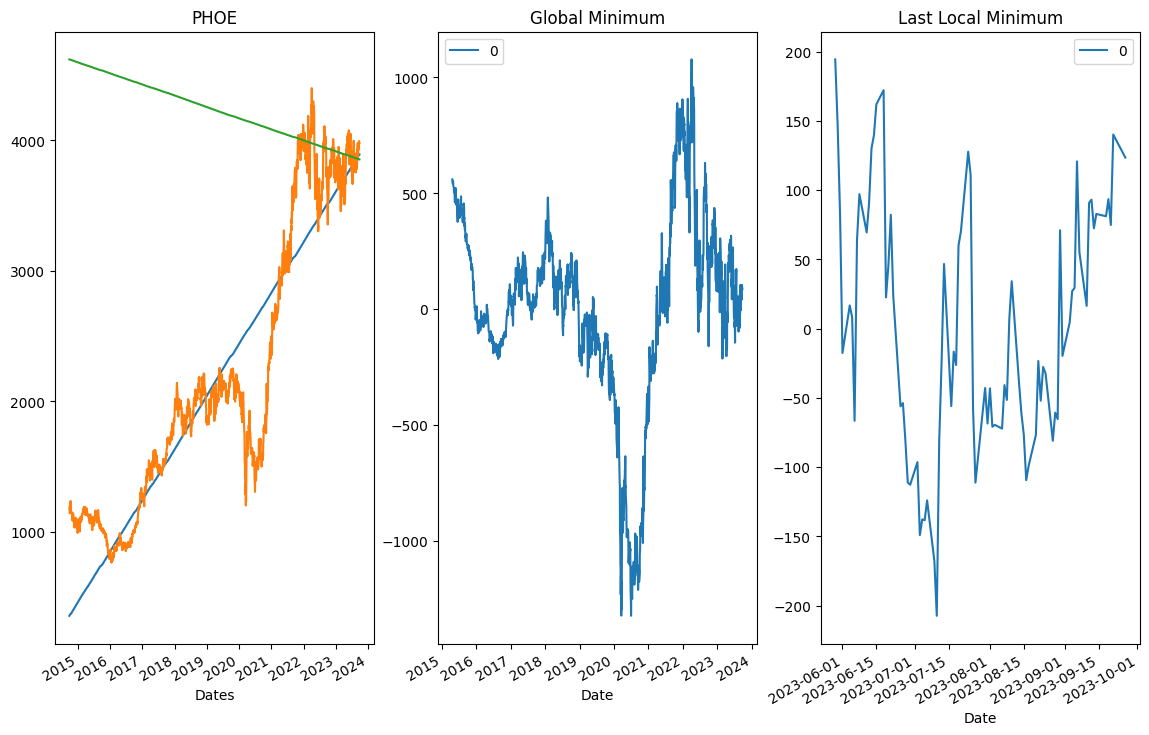

2015-04-19 00:00:00
                    err         min
2023-5-29  3.046324e+06  1745.37218
Local Regression Date:  2022-09-18 00:00:00


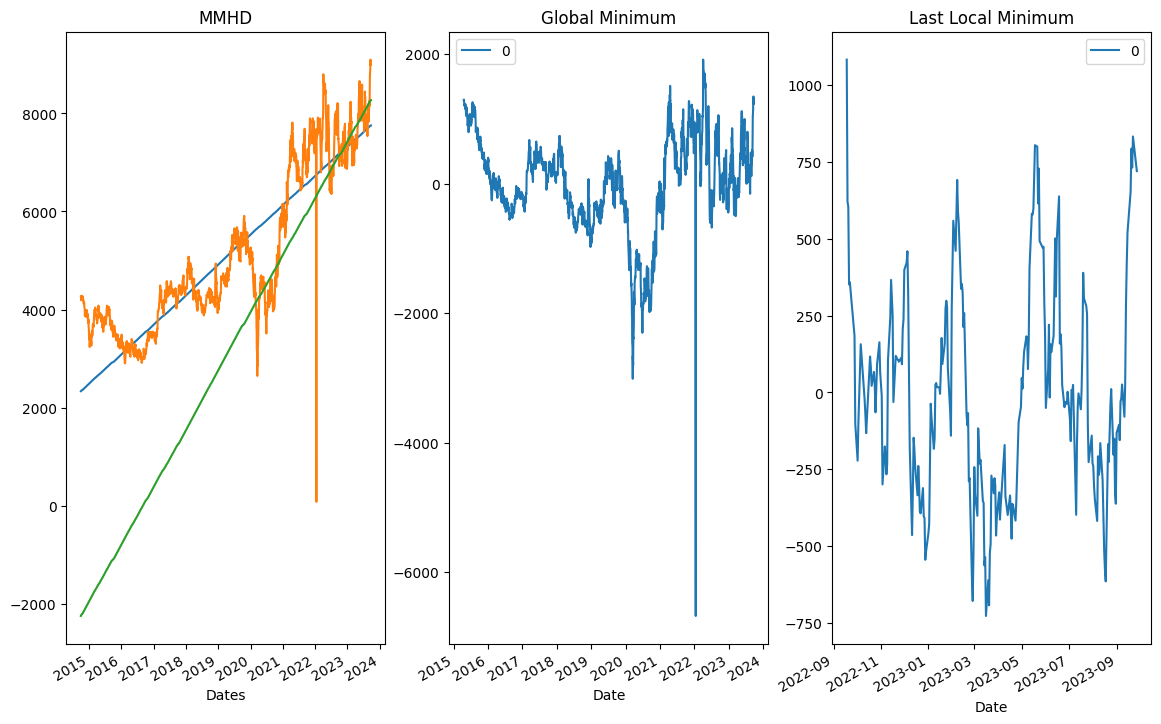

2015-04-19 00:00:00
                    err          min
2022-9-18  3.048674e+07  5521.479862


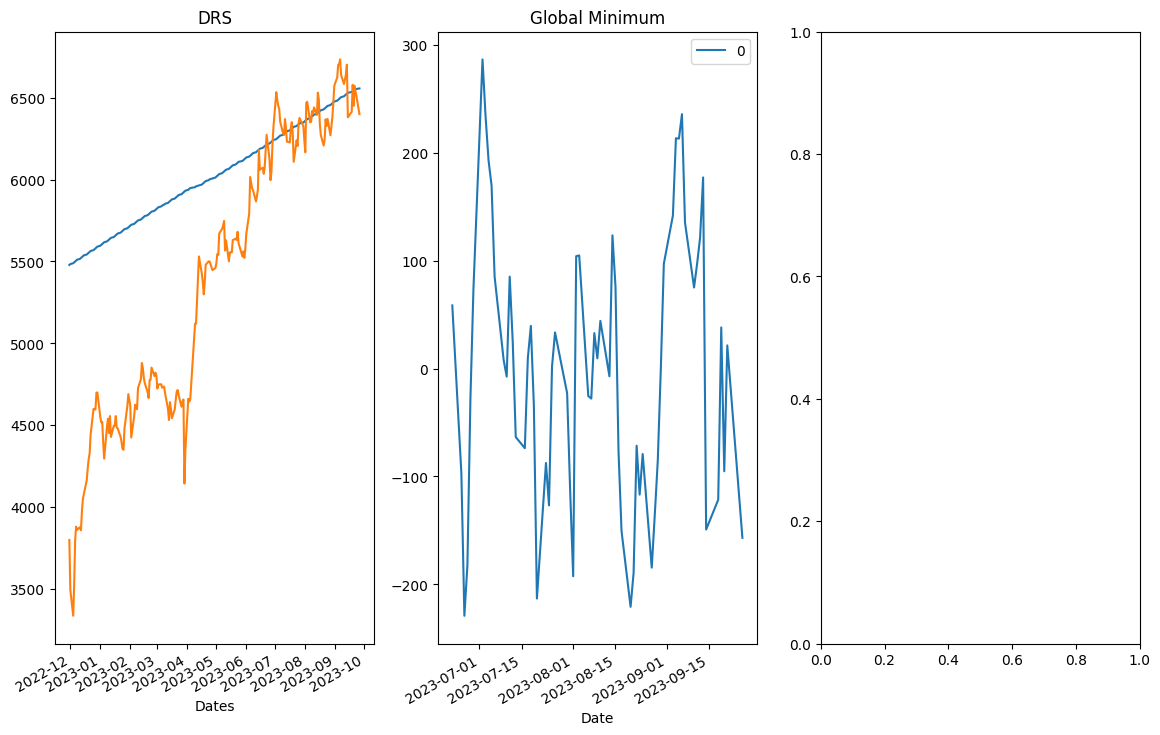

2023-06-22 00:00:00
Empty DataFrame
Columns: [err, min]
Index: []
Local Regression Date:  2023-02-08 00:00:00


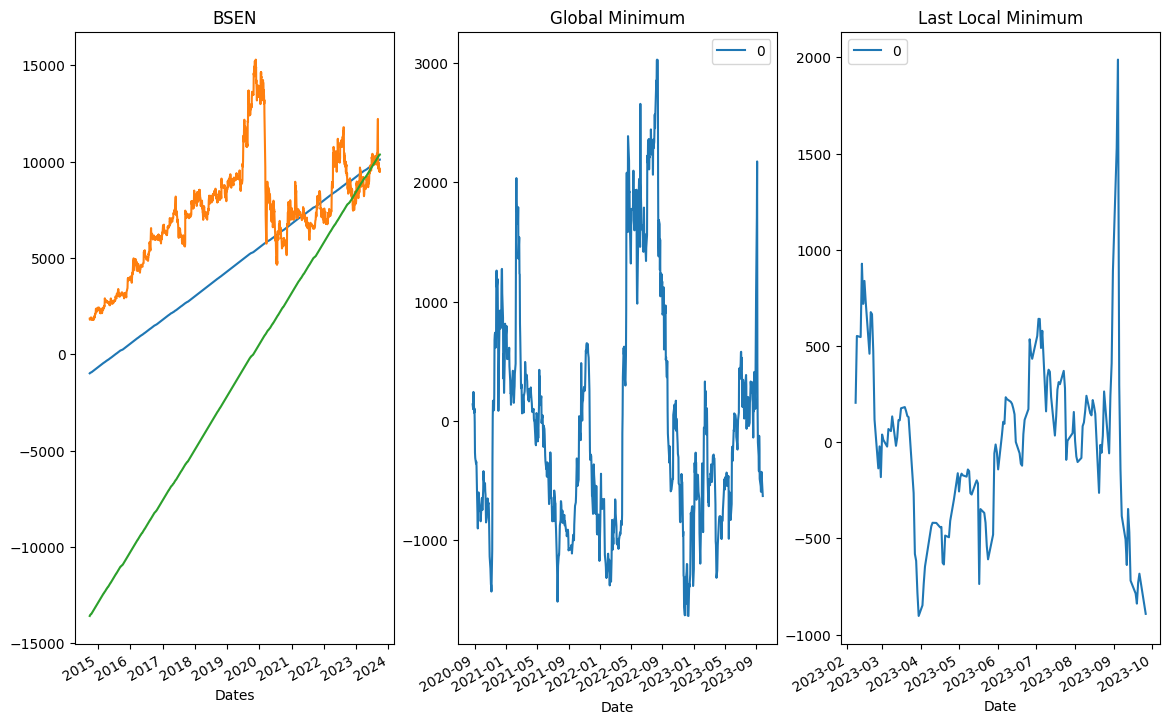

2020-08-24 00:00:00
                    err          min
2023-2-8   4.697438e+07  6853.786135
2020-8-24  3.959524e+07  6292.474638
Local Regression Date:  2023-05-14 00:00:00


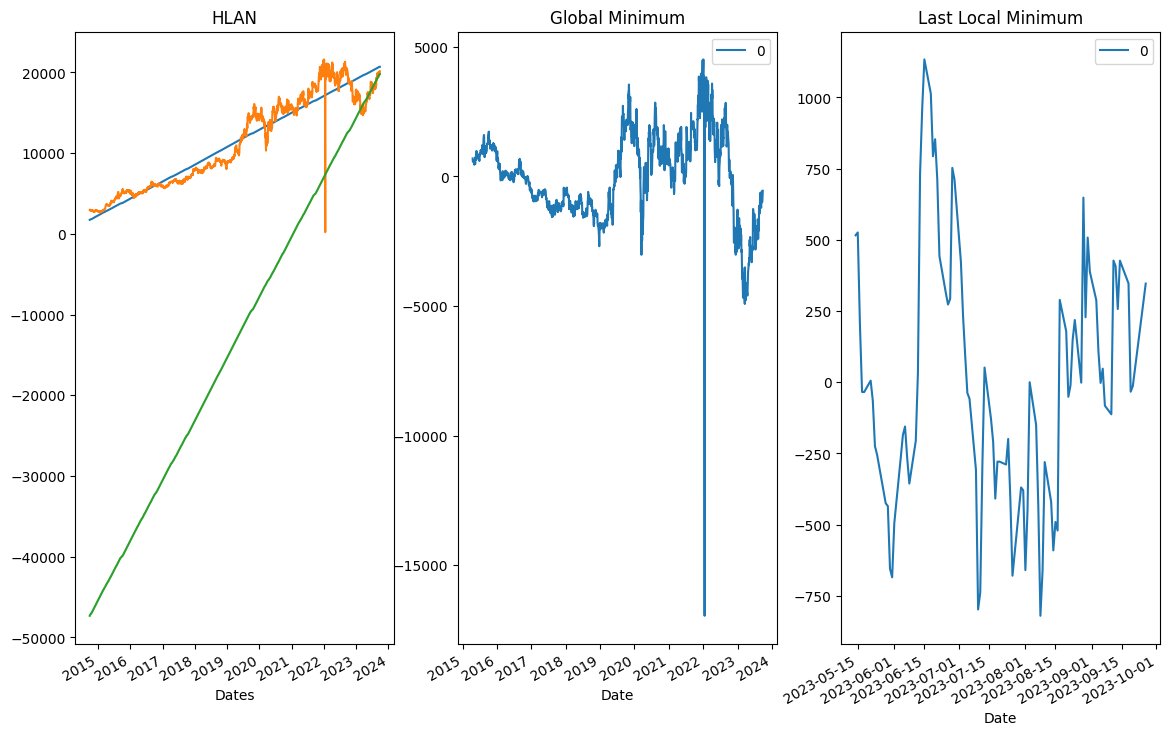

2015-04-19 00:00:00
                    err           min
2023-5-14  2.107164e+08  14516.074799
Local Regression Date:  2023-04-03 00:00:00


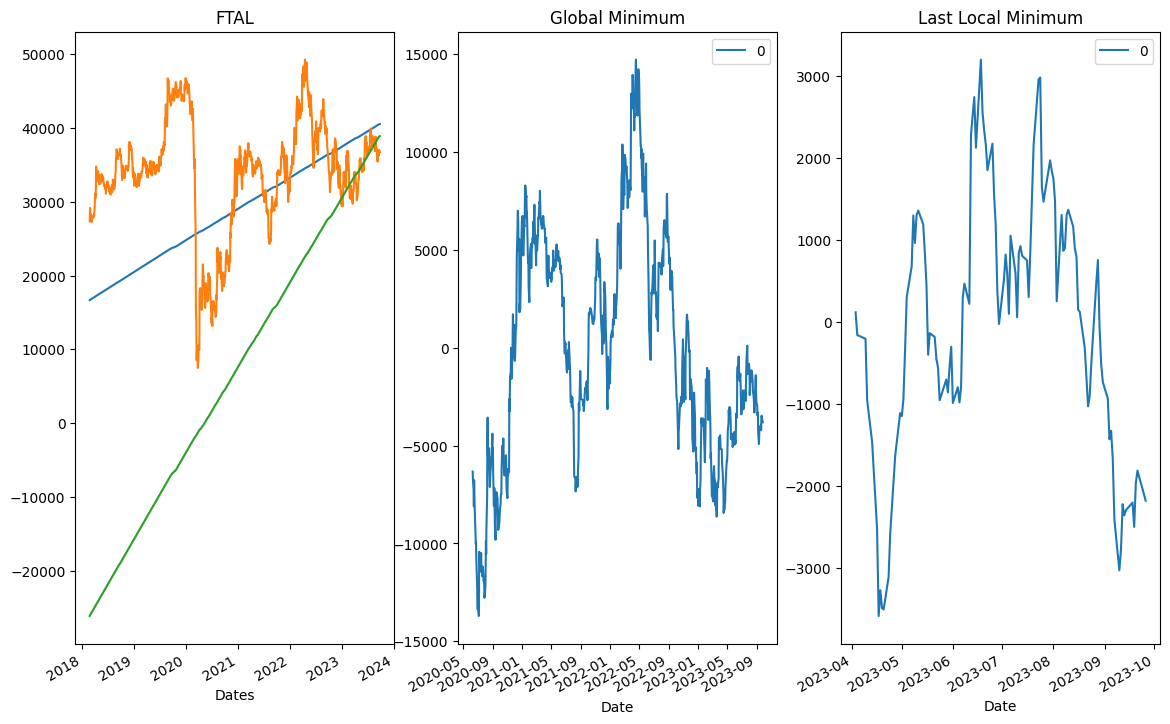

2020-06-10 00:00:00
                    err           min
2023-4-3   1.058267e+09  32531.019983
2020-6-10  1.035512e+09  32179.379098


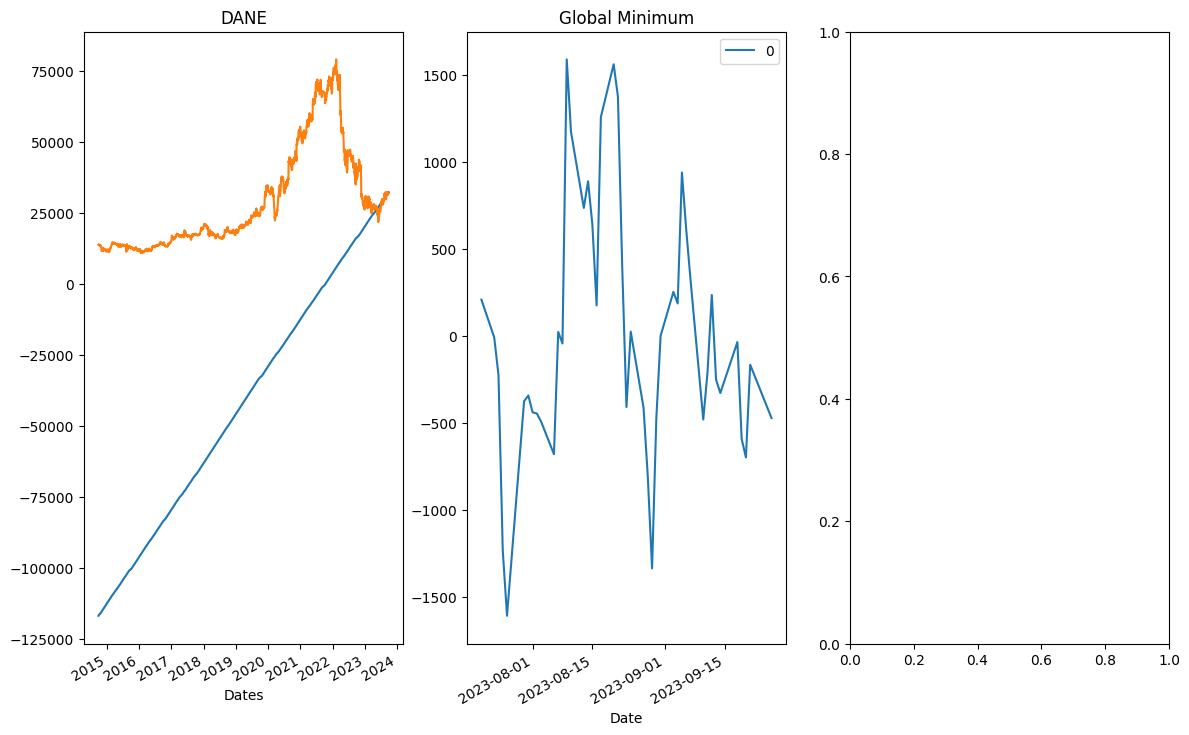

2023-07-20 00:00:00
Empty DataFrame
Columns: [err, min]
Index: []
Local Regression Date:  2023-06-26 00:00:00


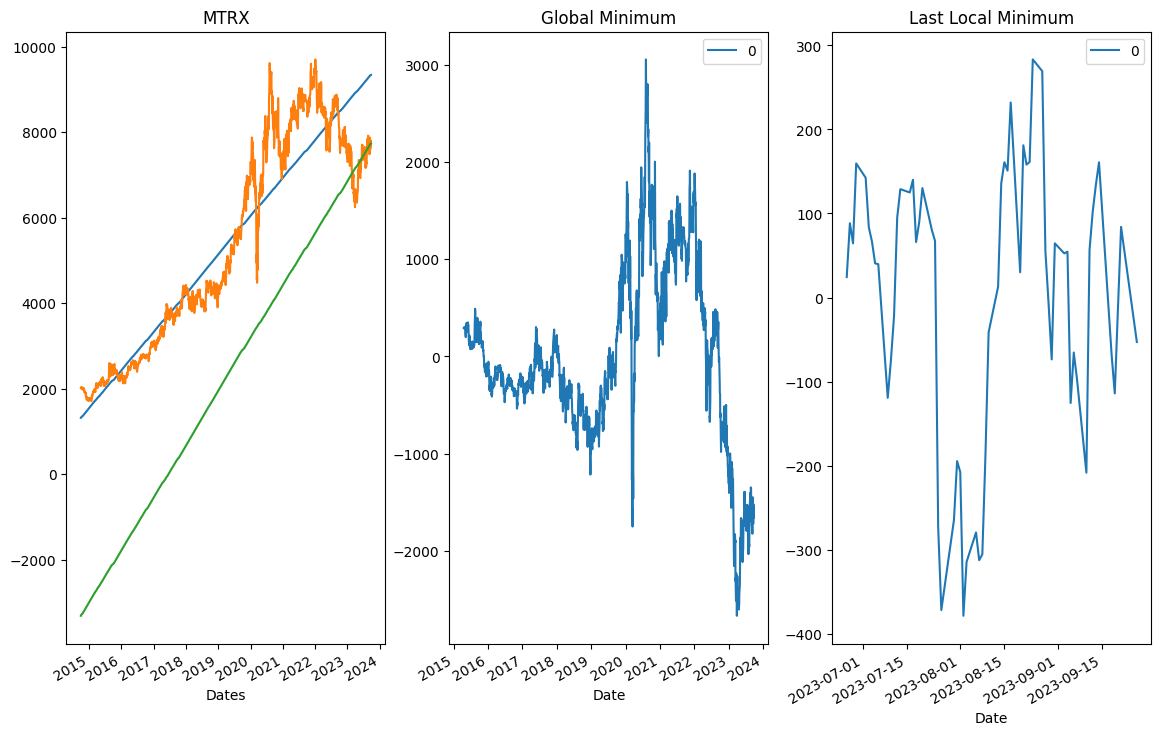

2015-04-19 00:00:00
                    err          min
2023-6-26  2.494026e+07  4994.022070
2021-2-17  4.120835e+07  6419.373123
Local Regression Date:  2020-08-23 00:00:00


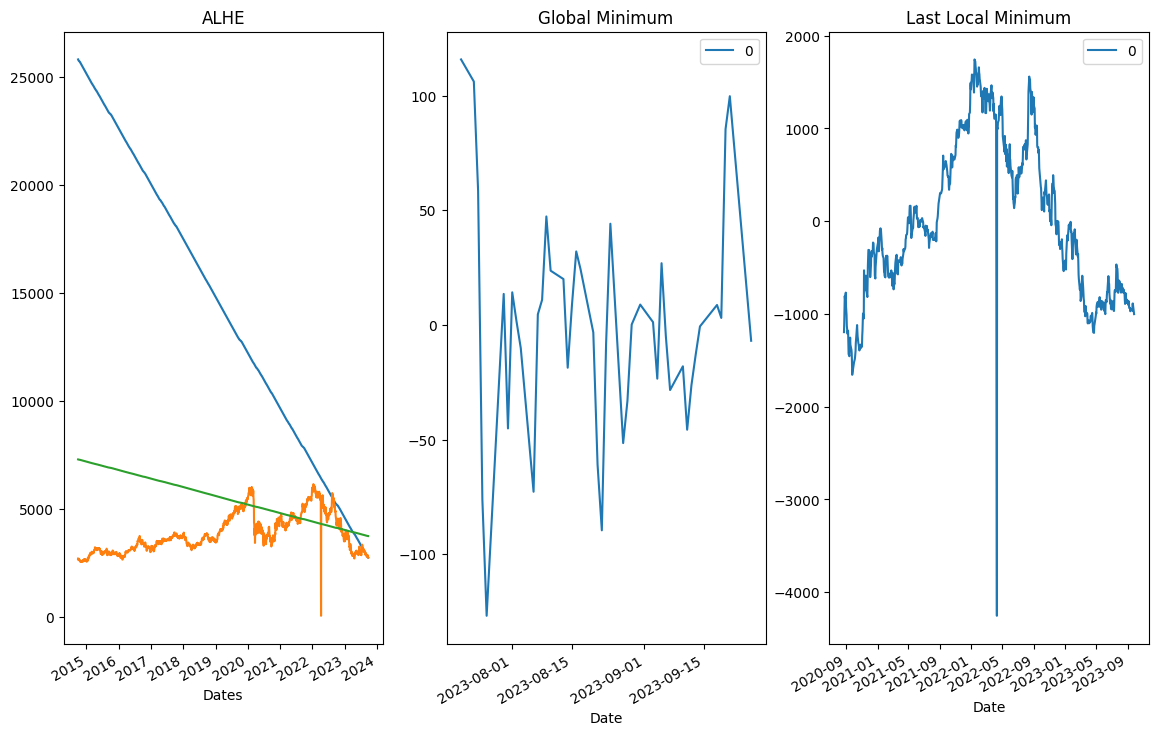

2023-07-20 00:00:00
                    err          min
2020-8-23  7.984560e+06  2825.696381
2018-3-8   8.931997e+06  2988.644759
2017-1-3   8.854445e+06  2975.641979
2015-9-16  8.687225e+06  2947.409816
Local Regression Date:  2022-09-05 00:00:00


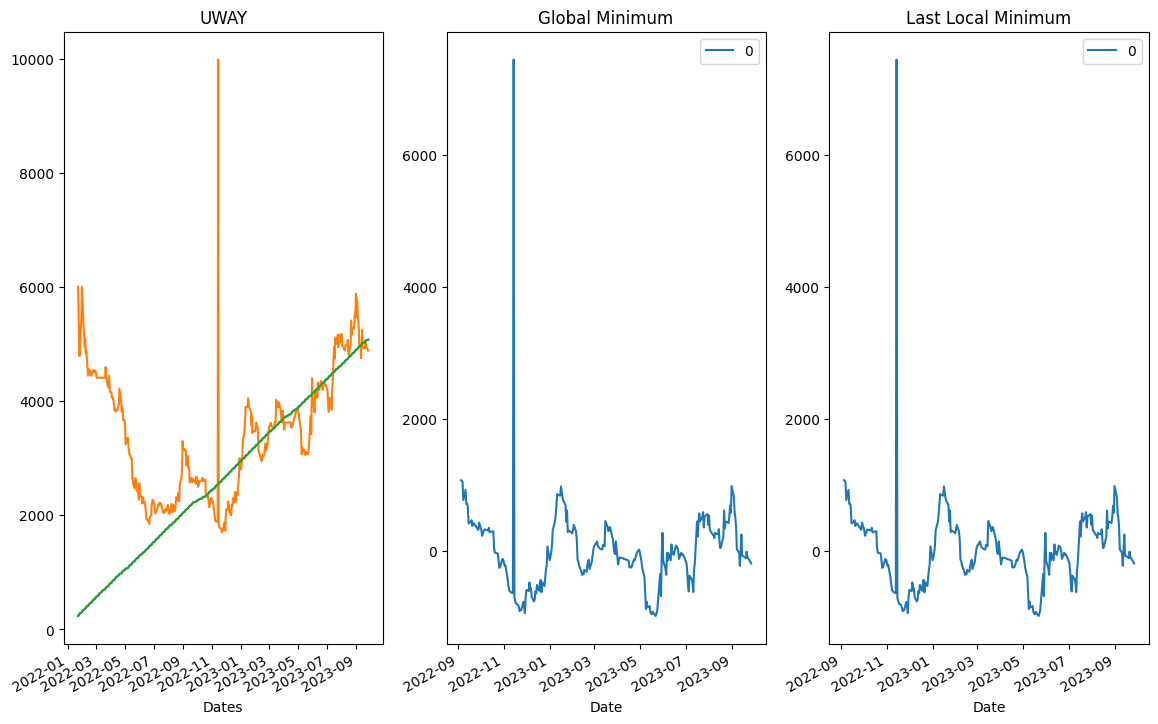

2022-09-05 00:00:00
                   err          min
2022-9-5  8.151912e+06  2855.155344
Local Regression Date:  2022-11-24 00:00:00


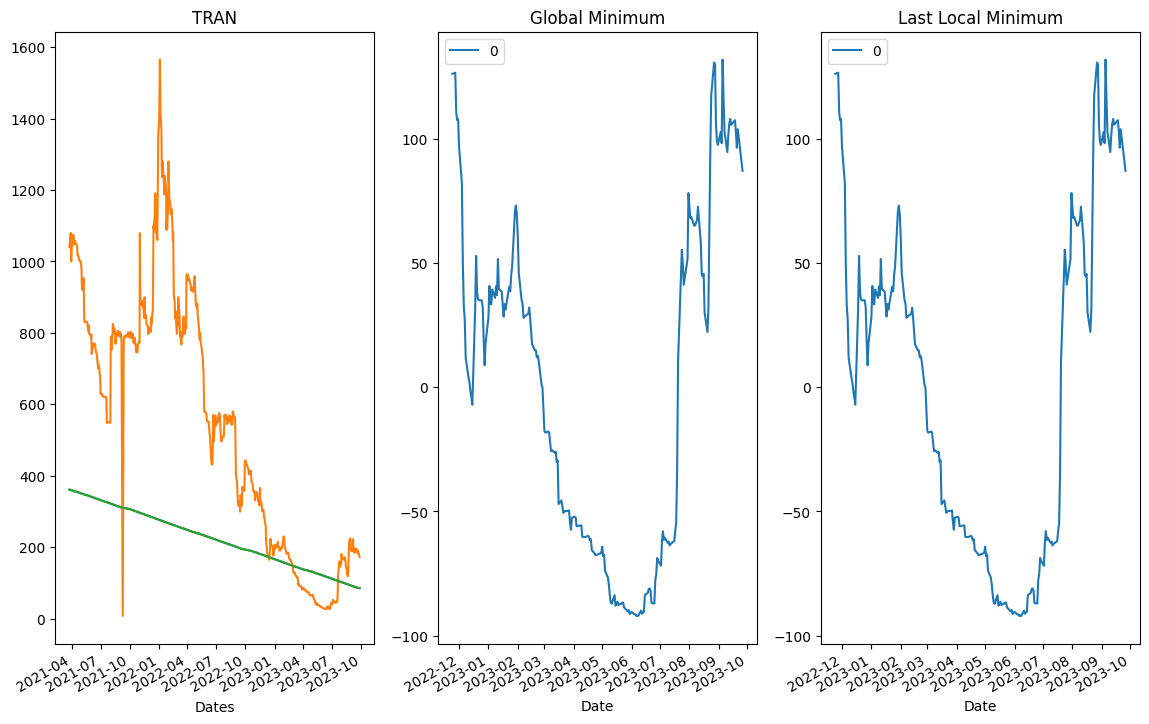

2022-11-24 00:00:00
                     err       min
2022-11-24  56953.965726  238.6503


In [62]:
ticker_vec = [leumi , discount , bezeq , cellcom , elbit , nice , teva , POLI,MZTF,FIBI, HARL, MGDL, CLIS, PHOE, MMHD, DRS, BSEN, HLAN, FTAL, DANE, MTRX ,ALHE, UWAY, TRAN]
ticker_vec_name = [
    "leumi",
    "discount",
    "bezeq",
    "cellcom",
    "elbit",
    "nice",
    "teva",
    "POLI",
    "MZTF",
    "FIBI",
    "HARL",
    "MGDL",
    "CLIS",
    "PHOE",
    "MMHD",
    "DRS",
    "BSEN",
    "HLAN",
    "FTAL",
    "DANE",
    "MTRX",
    "ALHE",
    "UWAY",
    "TRAN",
]

for ticker, ticker_name in zip(ticker_vec, ticker_vec_name):
    auto_calculation(ticker,ticker_name)